# Dataset utilizado

https://www.kaggle.com/datasets/kaushiksuresh147/customer-segmentation

Trabajaremos con nuestro dataset de segmentación de usuarios. Usaremos nuestros datos pre-procesados

In [1]:
import pandas as pd

In [3]:
dataset = pd.read_csv('train_type2.csv')

In [4]:
dataset.isna().sum().sum()

0

In [5]:
dataset.head()

,Gender,Ever_Married,Age,Graduated,Work_Experience,Family_Size,Profession,Average,High,Low,Var_1,Segmentation
0,0.0,0.0,22.0,0.0,1.0,4.0,6.0,0.0,0.0,1.0,3.0,3.0
1,1.0,1.0,38.0,1.0,0.0,3.0,3.0,1.0,0.0,0.0,3.0,0.0
2,1.0,1.0,67.0,1.0,1.0,1.0,3.0,0.0,0.0,1.0,5.0,1.0
3,0.0,1.0,67.0,1.0,0.0,2.0,8.0,0.0,1.0,0.0,5.0,1.0
4,1.0,1.0,40.0,1.0,0.0,6.0,4.0,0.0,1.0,0.0,5.0,0.0


In [6]:
import matplotlib.pyplot as plt

# From: https://stackoverflow.com/questions/14720331/how-to-generate-random-colors-in-matplotlib

def get_cmap(n, name='hsv'):
    '''Returns a function that maps each index in 0, 1, ..., n-1 to a distinct 
    RGB color; the keyword argument name must be a standard mpl colormap name.'''
    return plt.cm.get_cmap(name, n)

def mostrar_distribucion(dataset):
    columns = dataset.columns
    cmap = get_cmap(len(columns))
    i = 0
    plt.figure(figsize=(10, 5))
    for column_name in dataset.columns:
        plt.hist(dataset[column_name], alpha=0.5, bins=10, color=cmap(i), label=column_name)
        i += 1
    plt.legend()
    plt.show()

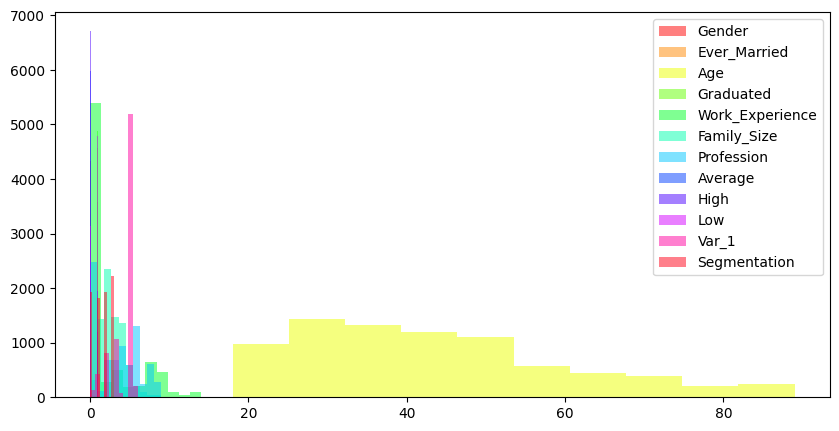

In [7]:
mostrar_distribucion(dataset)

# Random Forest

In [10]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np

In [11]:
X = np.array(dataset.drop(columns='Segmentation'))
y = np.array(dataset.Segmentation).astype(int) #Tenemos que convertir los datos a enteros

In [12]:
X.shape, y.shape

((7916, 11), (7916,))

In [22]:
model = RandomForestClassifier(n_estimators=100, random_state=0)
model.fit(X, y)

RandomForestClassifier(random_state=0)

In [23]:
dataset_test = pd.read_csv('test_type2.csv')

In [24]:
dataset_test.isna().sum().sum()

0

In [25]:
dataset_test.head()

,Gender,Ever_Married,Age,Graduated,Work_Experience,Family_Size,Profession,Average,High,Low,Var_1,Segmentation
0,1.0,1.0,36.0,1.0,0.0,1.0,3.0,0.0,0.0,1.0,5.0,1.0
1,0.0,1.0,37.0,1.0,8.0,4.0,6.0,1.0,0.0,0.0,5.0,0.0
2,1.0,1.0,69.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,5.0,0.0
3,0.0,1.0,59.0,0.0,11.0,2.0,5.0,0.0,1.0,0.0,5.0,1.0
4,1.0,0.0,19.0,0.0,0.0,4.0,9.0,0.0,0.0,1.0,5.0,0.0


In [26]:
X_pred = np.array(dataset_test.drop(columns='Segmentation'))

In [27]:
y_true = np.array(dataset_test.Segmentation)

In [28]:
y_pred = model.predict(X_pred)

In [29]:
from sklearn.metrics import classification_report

In [30]:
print(classification_report(y_true, y_pred, target_names=['A', 'B', 'C', 'D']))

              precision    recall  f1-score   support

           A       0.30      0.24      0.27       824
           B       0.19      0.20      0.20       535
           C       0.20      0.25      0.22       462
           D       0.28      0.30      0.29       742

    accuracy                           0.25      2563
   macro avg       0.24      0.25      0.24      2563
weighted avg       0.26      0.25      0.25      2563



In [64]:
print(classification_report(y_true, y_pred, target_names=['A', 'B', 'C', 'D']))

              precision    recall  f1-score   support

           A       0.28      0.21      0.24       824
           B       0.20      0.21      0.20       535
           C       0.18      0.24      0.20       462
           D       0.28      0.28      0.28       742

    accuracy                           0.24      2563
   macro avg       0.23      0.24      0.23      2563
weighted avg       0.24      0.24      0.24      2563

